In [51]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/gasuseitor/Tareas/main/2021_CL_Region_Mobility_Report.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/gasuseitor/Tareas/main/applemobilitytrends-2021-12-09.csv")

In [54]:
df = df.drop(['country_region_code','country_region','iso_3166_2_code','census_fips_code','place_id','metro_area','sub_region_2'], axis=1)
df = df.dropna()



In [55]:
df2 = df2[(df2['region'] == 'Chile')]
df2 = df2.drop(['geo_type','region','alternative_name','sub-region','country'], axis=1)
df2 = df2.melt(id_vars = ['transportation_type'])
df2

,transportation_type,variable,value
0,driving,2020-01-13,100.00
1,walking,2020-01-13,100.00
2,driving,2020-01-14,99.01
3,walking,2020-01-14,102.58
4,driving,2020-01-15,102.57
...,...,...,...
1389,walking,2021-12-07,144.41
1390,driving,2021-12-08,112.95
1391,walking,2021-12-08,95.62
1392,driving,2021-12-09,137.00


In [56]:
df = df.groupby(['sub_region_1','date']).mean().reset_index() # Se agrupo por region, calculando un promedio de todas las comunas que las componen.
df['date'] = pd.to_datetime(df['date'])



In [57]:
df

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Antofagasta,2021-01-01,-87.000000,-87.000000,-60.666667,-67.000000,-69.666667,23.666667
1,Antofagasta,2021-01-02,-55.666667,-33.333333,-59.666667,-52.000000,-32.666667,17.333333
2,Antofagasta,2021-01-03,-51.666667,-34.666667,-62.333333,-38.000000,-21.000000,13.000000
3,Antofagasta,2021-01-04,-23.666667,-2.666667,-34.333333,-20.333333,-15.333333,9.333333
4,Antofagasta,2021-01-05,-24.333333,-1.333333,-34.666667,-20.000000,-16.666667,9.666667
...,...,...,...,...,...,...,...,...
5119,Ñuble,2021-01-27,-35.500000,-15.000000,4.000000,-54.500000,-96.500000,16.000000
5120,Ñuble,2021-01-28,-40.500000,-20.000000,-1.500000,-58.500000,-96.500000,17.000000
5121,Ñuble,2021-01-29,-45.500000,-17.500000,-18.500000,-59.500000,-97.000000,21.000000
5122,Ñuble,2021-01-30,-56.000000,-29.000000,-31.500000,-62.000000,-100.000000,24.000000


In [58]:
Metropolitana = df[(df['sub_region_1'] == 'Metropolitana')]
Metropolitana = df.resample('W', on='date').mean().reset_index()
Metropolitana

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-03,-63.313244,-47.352431,-47.080109,-58.532366,-42.050347,18.366319
1,2021-01-10,-35.754987,-14.427499,-38.793651,-36.870764,-18.525794,13.607679
2,2021-01-17,-41.119207,-20.638977,-41.409067,-39.126435,-24.105602,13.744048
3,2021-01-24,-43.899560,-23.219005,-40.469970,-40.791184,-26.421868,14.198520
4,2021-01-31,-44.865133,-22.623874,-43.612720,-41.700397,-26.840305,15.489597
5,2021-02-07,-42.369620,-18.920330,-41.102106,-36.893143,-22.564274,14.087397
6,2021-02-14,-41.126774,-17.197402,-39.858917,-33.063816,-22.106742,13.570055
7,2021-02-21,-36.411916,-13.572688,-36.321371,-28.523867,-21.205701,12.549279
8,2021-02-28,-33.853345,-10.743934,-35.010828,-26.947166,-17.341043,11.059580
9,2021-03-07,-35.322058,-11.372482,-42.386504,-29.745707,-15.573603,11.886619


<IPython.core.display.Javascript object>


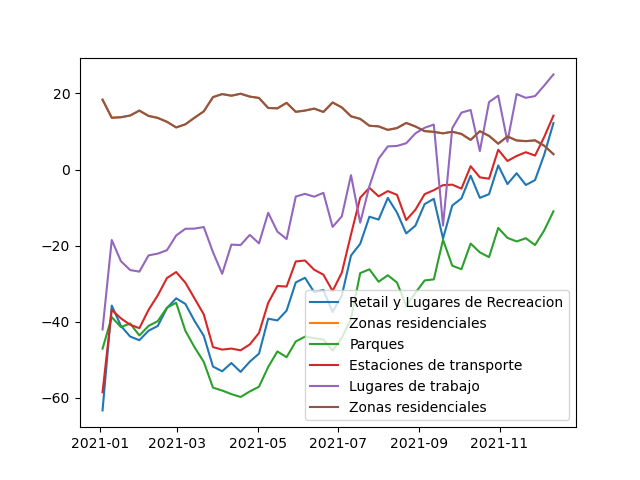

In [59]:
x1 = Metropolitana['retail_and_recreation_percent_change_from_baseline']
x2 = Metropolitana['grocery_and_pharmacy_percent_change_from_baseline']
x3 = Metropolitana['parks_percent_change_from_baseline']
x4 = Metropolitana['transit_stations_percent_change_from_baseline']
x5 = Metropolitana['workplaces_percent_change_from_baseline']
x6 = Metropolitana['residential_percent_change_from_baseline']

y = Metropolitana['date']



fig, ax = plt.subplots()
ax.plot(y, x1, label = 'Retail y Lugares de Recreacion')
ax.plot(y, x6, label = 'Zonas residenciales')
ax.plot(y, x3, label = 'Parques')
ax.plot(y, x4, label = 'Estaciones de transporte')
ax.plot(y, x5, label = 'Lugares de trabajo')
ax.plot(y, x6, label = 'Zonas residenciales')
plt.legend()
plt.show()



Se puede apreciar que en las semanas/dias de cuaretena se nota en los graficos una menor asistencias a Retail, Estaciones de Transporte, Parques.